In [ ]:
from keras.layers import Input,Dense
from keras.models import Model
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

X_train=X_train.reshape((len(X_train),np.prod(X_train.shape[1:])))
X_test=X_test.reshape((len(X_test),np.prod(X_test.shape[1:])))

print(X_train.shape,X_test.shape)

(60000, 784) (10000, 784)


In [ ]:
inpmodel=Input(shape=(784,))
encoded_layer=Dense(32,activation='relu')(inpmodel)
decoded_layer=Dense(784,activation='sigmoid')(encoded_layer)

autocode=Model(inpmodel,decoded_layer)
autocode.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
autocode.compile(optimizer='adam' , loss='binary_crossentropy')

auto=autocode.fit(X_train,X_train,batch_size=256,epochs=10,validation_data=(X_test,X_test),shuffle=True)

Epoch 1/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0962 - val_loss: 0.0944
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0953 - val_loss: 0.0939
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0948 - val_loss: 0.0933
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0945 - val_loss: 0.0930
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0942 - val_loss: 0.0929
Epoch 6/10
235/235 [==============================] - 4s 15ms/step - loss: 0.0940 - val_loss: 0.0927
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0938 - val_loss: 0.0925
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0937 - val_loss: 0.0924
Epoch 9/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0936 - val_loss: 0.0923
Epoch 10/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0935 - val_lo

In [ ]:
pred=autocode.predict(X_test)

313/313 [==============================] - 1s 3ms/step


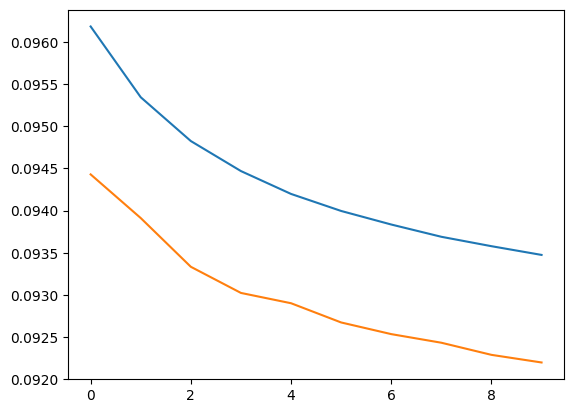

In [ ]:
plt.plot(range(0,10),auto.history['loss'])
plt.plot(range(0,10),auto.history['val_loss'])


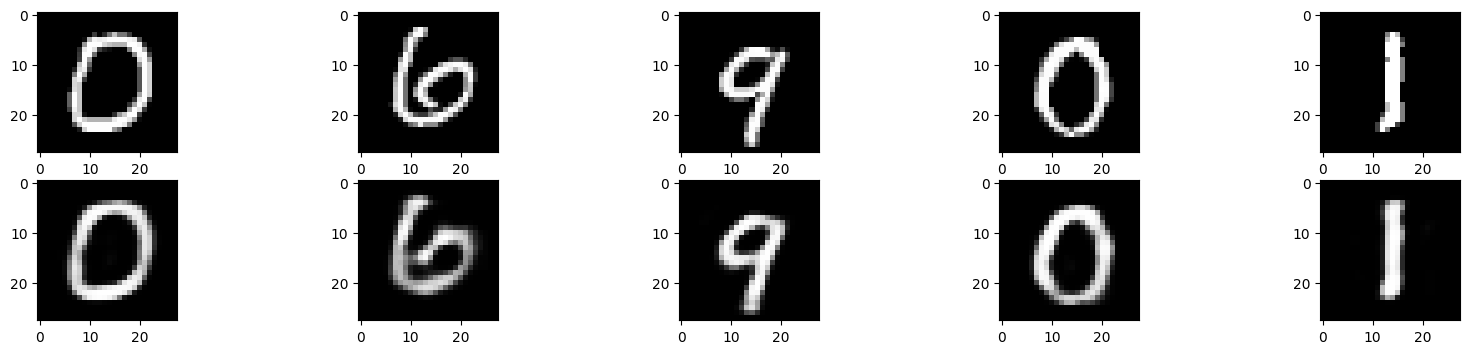

In [ ]:
n=5
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(X_test[i+10].reshape(28,28))
  plt.gray()
  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(pred[i+10].reshape(28,28))
  plt.gray()
plt.show()